In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lasio

In [2]:
#import train data
las1=lasio.read("well-log-data/31_2-21 S.las")
las2=lasio.read("well-log-data/25_6-3.las")
las3=lasio.read("well-log-data/25_11-5.las")
las4=lasio.read("well-log-data/16_8-1.las")

In [3]:
#convert to data frame
df1=las1.df()
df2=las2.df()
df3=las3.df()
df4=las4.df()


In [4]:
#display unique characters
print(df1["FORCE_2020_LITHOFACIES_LITHOLOGY"].unique())
print(df2["FORCE_2020_LITHOFACIES_LITHOLOGY"].unique())
print(df3["FORCE_2020_LITHOFACIES_LITHOLOGY"].unique())
print(df4["FORCE_2020_LITHOFACIES_LITHOLOGY"].unique())

[   nan 70000. 80000. 65000. 65030. 30000. 90000.]
[   nan 65000. 65030. 30000. 70000. 99000. 80000.]
[   nan 65000. 30000. 70032. 80000. 70000. 65030.]
[   nan 65000. 65030. 70000. 74000. 99000. 30000. 80000. 70032.]


# Clean and Prepare Train Data

In [5]:
#drop columns that are not mutual
df1=df1.drop(["BS", "ROPA", "DTS", "PEF", "DRHO"], axis=1)
df2=df2.drop(["BS", "MUDWEIGHT", "RSHA", "RMIC","SP", "DTS"], axis=1)
df3=df3.drop(["BS", "DCAL", "MUDWEIGHT", "SP", "DRHO"], axis=1)
df4=df4.drop(["MUDWEIGHT","SP","DRHO","RSHA"], axis=1)


In [6]:
df1.info()
df2.info()
df3.info()
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18731 entries, 372.0084 to 3218.9684
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   FORCE_2020_LITHOFACIES_CONFIDENCE  7841 non-null   float64
 1   FORCE_2020_LITHOFACIES_LITHOLOGY   7840 non-null   float64
 2   CALI                               7842 non-null   float64
 3   ROP                                18664 non-null  float64
 4   RDEP                               18567 non-null  float64
 5   RMED                               18524 non-null  float64
 6   DTC                                18199 non-null  float64
 7   NPHI                               7835 non-null   float64
 8   GR                                 18666 non-null  float64
 9   RHOB                               7800 non-null   float64
 10  DEPTH_MD                           18567 non-null  float64
 11  X_LOC                              18567 non-nul

In [7]:
#merge dataframe
merged_df=pd.concat([df1,df2,df3,df4])
merged_df.shape

(62042, 14)

In [8]:
#drop column with <50% data entry
merged_df=merged_df.drop(["NPHI", "RHOB"], axis=1)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62042 entries, 372.0084 to 2313.8951968
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   FORCE_2020_LITHOFACIES_CONFIDENCE  31609 non-null  float64
 1   FORCE_2020_LITHOFACIES_LITHOLOGY   31579 non-null  float64
 2   CALI                               38367 non-null  float64
 3   ROP                                61261 non-null  float64
 4   RDEP                               57198 non-null  float64
 5   RMED                               57114 non-null  float64
 6   DTC                                54875 non-null  float64
 7   GR                                 61379 non-null  float64
 8   DEPTH_MD                           57198 non-null  float64
 9   X_LOC                              57198 non-null  float64
 10  Y_LOC                              57198 non-null  float64
 11  Z_LOC                              57198 non-

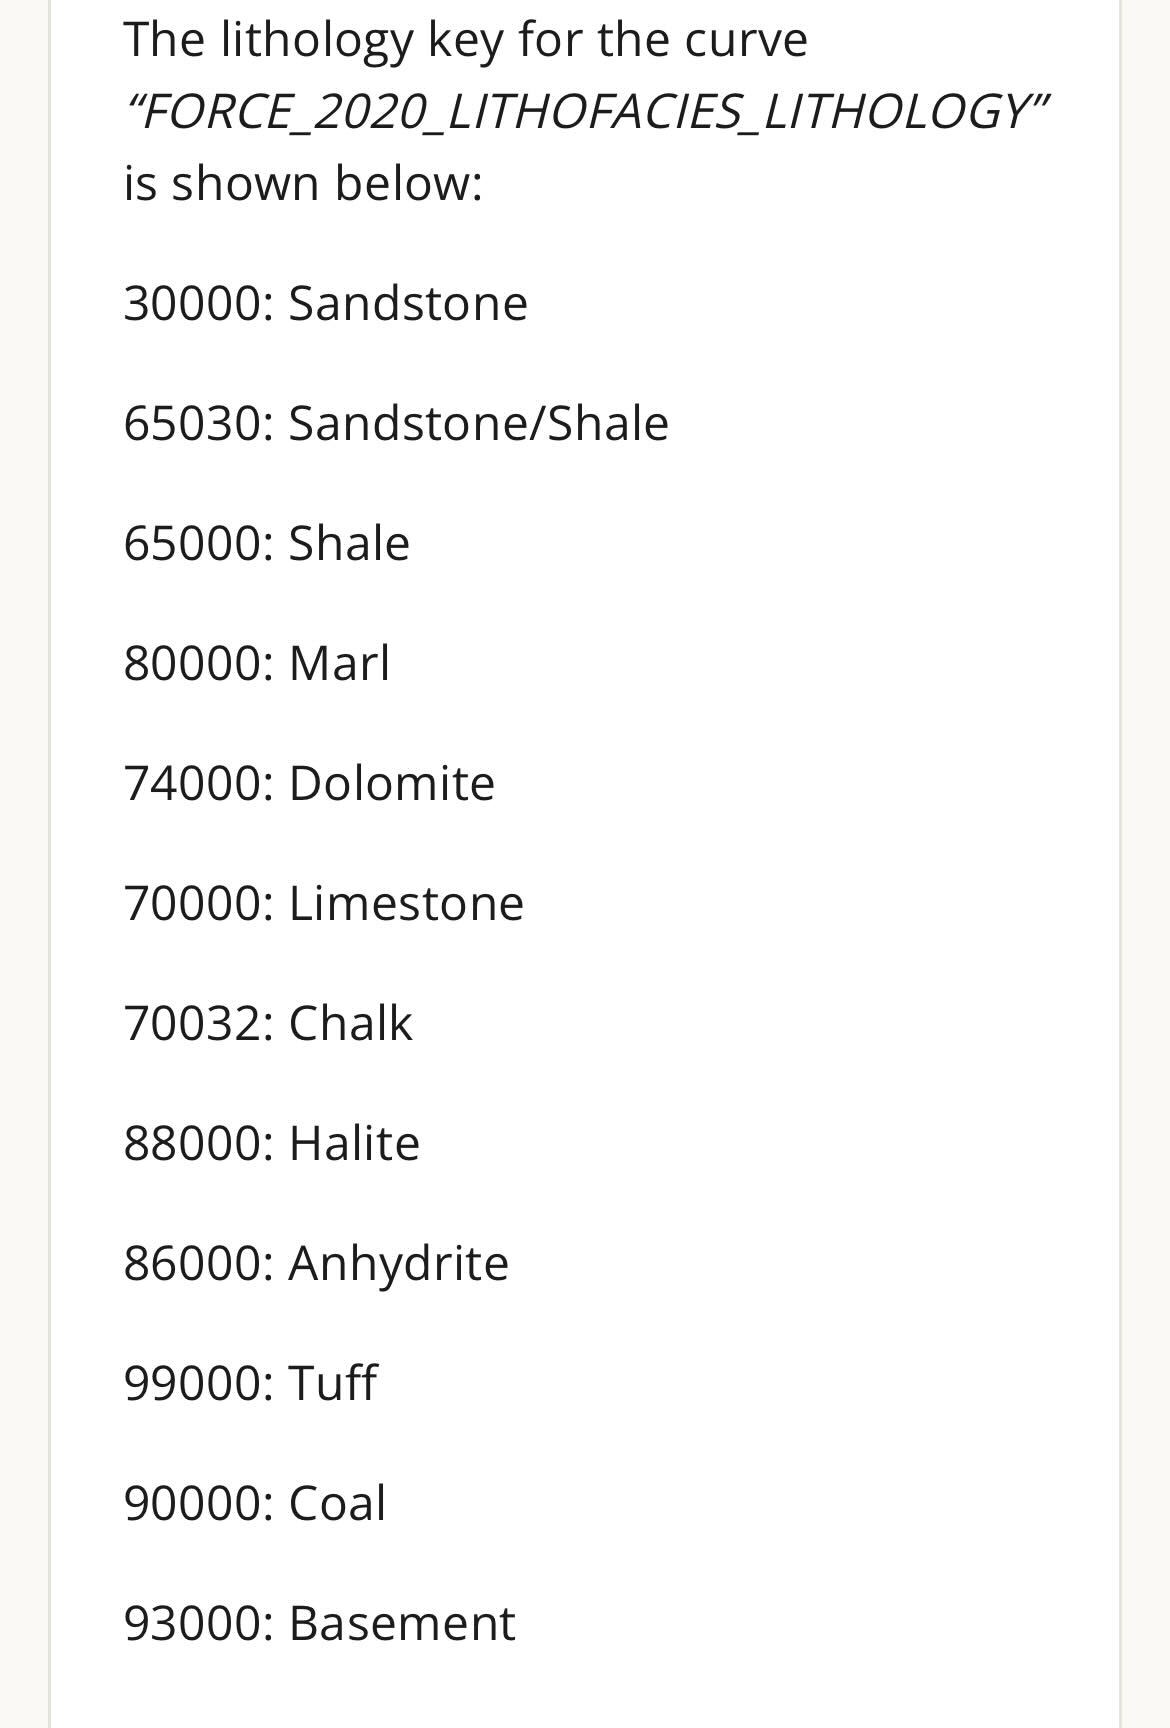

In [9]:
from IPython.display import display, Image

image_path = 'lithology facies.jpg'

display(Image(filename=image_path))

In [10]:
merged_df["FORCE_2020_LITHOFACIES_LITHOLOGY"].unique()

array([   nan, 70000., 80000., 65000., 65030., 30000., 90000., 99000.,
       70032., 74000.])

In [11]:
lithologies=  {30000: [0, "Sandstone"],
    65000: [1, "Shale"],
    65030: [2, "Sandstone/Stone"],
    70000: [3, "Limestone"],
    70032: [4, "Chalk"],
    74000: [5, "Dolomite"],
    80000: [6, "Marl"],
    99000: [7, "Tuff"],
    90000: [8, "Coal"]}


In [12]:
lithologies[65000][1]

'Shale'

In [13]:
for key, value in lithologies.items():
        merged_df.loc[merged_df["FORCE_2020_LITHOFACIES_LITHOLOGY"] == key, "FORCE_2020_LITHOFACIES_LITHOLOGY"] = lithologies[key][0]


In [14]:
merged_df["FORCE_2020_LITHOFACIES_LITHOLOGY"] = merged_df["FORCE_2020_LITHOFACIES_LITHOLOGY"].astype("Int64")

In [15]:
merged_df["FORCE_2020_LITHOFACIES_LITHOLOGY"].unique()

<IntegerArray>
[<NA>, 3, 6, 1, 2, 0, 8, 7, 4, 5]
Length: 10, dtype: Int64

In [16]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62042 entries, 372.0084 to 2313.8951968
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   FORCE_2020_LITHOFACIES_CONFIDENCE  31609 non-null  float64
 1   FORCE_2020_LITHOFACIES_LITHOLOGY   31579 non-null  Int64  
 2   CALI                               38367 non-null  float64
 3   ROP                                61261 non-null  float64
 4   RDEP                               57198 non-null  float64
 5   RMED                               57114 non-null  float64
 6   DTC                                54875 non-null  float64
 7   GR                                 61379 non-null  float64
 8   DEPTH_MD                           57198 non-null  float64
 9   X_LOC                              57198 non-null  float64
 10  Y_LOC                              57198 non-null  float64
 11  Z_LOC                              57198 non-

# Prepare Test Data Set

In [17]:
#import test data
las5=lasio.read("well-log-data/15_9-13.las")
test_df=las5.df()

In [18]:
#Eliminate columns that are not mutual with the train data  set
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21441 entries, 25.0 to 3283.88
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   FORCE_2020_LITHOFACIES_CONFIDENCE  18277 non-null  float64
 1   FORCE_2020_LITHOFACIES_LITHOLOGY   18270 non-null  float64
 2   CALI                               18345 non-null  float64
 3   MUDWEIGHT                          17520 non-null  float64
 4   ROP                                20297 non-null  float64
 5   RDEP                               20956 non-null  float64
 6   RSHA                               1623 non-null   float64
 7   RMED                               20957 non-null  float64
 8   RXO                                1627 non-null   float64
 9   SP                                 20956 non-null  float64
 10  DTC                                21282 non-null  float64
 11  NPHI                               14105 non-null  flo

In [19]:
test_df=test_df.drop(["MUDWEIGHT", "RSHA", "RHOB", "RXO", "SP", "DRHO", "PEF", "NPHI"], axis=1)


In [20]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21441 entries, 25.0 to 3283.88
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   FORCE_2020_LITHOFACIES_CONFIDENCE  18277 non-null  float64
 1   FORCE_2020_LITHOFACIES_LITHOLOGY   18270 non-null  float64
 2   CALI                               18345 non-null  float64
 3   ROP                                20297 non-null  float64
 4   RDEP                               20956 non-null  float64
 5   RMED                               20957 non-null  float64
 6   DTC                                21282 non-null  float64
 7   GR                                 20900 non-null  float64
 8   DEPTH_MD                           20956 non-null  float64
 9   X_LOC                              20956 non-null  float64
 10  Y_LOC                              20956 non-null  float64
 11  Z_LOC                              20956 non-null  flo

In [21]:
test_df["FORCE_2020_LITHOFACIES_LITHOLOGY"] = test_df["FORCE_2020_LITHOFACIES_LITHOLOGY"].astype("Int64")


In [22]:
test_df["FORCE_2020_LITHOFACIES_LITHOLOGY"].unique()

<IntegerArray>
[<NA>, 65000, 30000, 65030, 70000, 99000, 80000, 86000, 74000]
Length: 9, dtype: Int64

In [23]:
# Replace column's entries with corresponding discrete values for test data sets

In [24]:
for key, value in lithologies.items():
    test_df.loc[test_df["FORCE_2020_LITHOFACIES_LITHOLOGY"] == key, "FORCE_2020_LITHOFACIES_LITHOLOGY"] = lithologies[key][0]


In [25]:
test_df["FORCE_2020_LITHOFACIES_LITHOLOGY"].unique()

<IntegerArray>
[<NA>, 1, 0, 2, 3, 7, 6, 86000, 5]
Length: 9, dtype: Int64

# Select a model (XGBoost)

In [26]:
#merged_df= merged_df.dropna()

#x= merged_df.drop(["FORCE_2020_LITHOFACIES_LITHOLOGY"], axis=1)
#y=merged_df["FORCE_2020_LITHOFACIES_LITHOLOGY"]


#train data
#x_train, y_train= (x,y)

#import xgboost as xgb
#model = xgb.XGBClassifier()
#model.fit(x_train, y_train)

In [27]:
#encoding for test data set
#dummies = pd.get_dummies(test_df["FORCE_2020_LITHOFACIES_LITHOLOGY"])
#dummies= dummies.astype(int)
#dummies

In [28]:
#new_test_df = pd.concat([test_df, dummies], axis=1)
#new_test_df = new_test_df.drop(["FORCE_2020_LITHOFACIES_LITHOLOGY", 7], axis=1)

In [29]:
#x_test = new_test_df.drop([0, 1, 2, 3, 5, 6, 8], axis=1)
#y_test = new_test_df([0, 1, 2, 3, 5, 6, 8])

In [30]:
#model.score(x_test, y_test)

In [31]:
#y_train.shape

In [32]:
#y_test.shape

In [33]:
#y_test.head()

In [34]:
#y_train.head()

In [35]:
#Since y_train and y_test have different shapes, let's add a new column to y_test
#new_cols = [4]
#for col in new_cols:
   # y_test[col] = 0  # Fill new columns with zeros

In [36]:
#model.score(x_test, y_test)

# Try another model (RandomForestClassifier)

In [37]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

merged_df= merged_df.dropna()

x= merged_df.drop(["FORCE_2020_LITHOFACIES_LITHOLOGY"], axis=1)
y=merged_df["FORCE_2020_LITHOFACIES_LITHOLOGY"]


#train data
x_train, y_train= (x,y)

#select a model
model1=RandomForestClassifier()

#fit model
model1.fit(x_train, y_train)

RandomForestClassifier()

In [38]:
test_df= test_df.dropna()

x=test_df.drop(["FORCE_2020_LITHOFACIES_LITHOLOGY"], axis=1)
y=test_df["FORCE_2020_LITHOFACIES_LITHOLOGY"]

x_test, y_test=(x,y)


model1.score(x_test, y_test)

0.7066924778761062

In [39]:
y_preds=model1.predict(x_test)

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [41]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred
    """
    
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds, average='micro')
    recall = recall_score(y_true, y_preds, average='micro')
    f1 = f1_score(y_true, y_preds, average='micro')
    metric_dict = {"accuracy": round(accuracy, 2),
                  "precision": round(precision, 2),
                  "recall": round(recall, 2),
                  "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    

In [42]:
baseline_metrics = evaluate_preds(y_test, y_preds)
baseline_metrics

Acc: 70.67%
Precision: 0.71
Recall: 0.71
F1 score: 0.71


**Tune HyperParameter**

In [44]:
model2 = RandomForestClassifier(n_estimators=100,
                              max_depth=10)
model2.fit(x_train, y_train)
model2_y_preds = model2.predict(x_test)
model2_metrics = evaluate_preds(y_test, model2_y_preds)

Acc: 71.40%
Precision: 0.71
Recall: 0.71
F1 score: 0.71


**Tune Hyper parameters using RandomSearchCV**

In [45]:
np.random.seed(42)
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV



grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
       "max_depth": [None, 5, 10, 20, 30],
       "max_features": ["auto", "sqrt"],
       "min_samples_split": [2, 4, 6],
       "min_samples_leaf": [1, 2, 4]}



In [46]:
#model3= RandomizedSearchCV(model1, param_distributions=grid, n_iter=5, scoring="roc_auc", n_jobs=-1, cv=5, verbose=3)
#model3.fit(x_train, y_train)
#model3_y_preds = model3.predict(x_test)
#model3_metrics = evaluate_preds(y_test,model3_y_preds)

**Create a Confusion Matrix on Model2 since it performs better amongst the 3 models**

In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, model2_y_preds)

array([[  318,  2468,    10,     0,    21,   115,     0],
       [    0, 12345,     0,     0,     0,   125,     0],
       [    0,   681,     0,     0,     0,    27,     0],
       [   11,    54,     0,     3,  1264,    36,     0],
       [    0,     0,     0,     0,     0,     0,     0],
       [    0,   146,     0,     0,    40,   243,     0],
       [    4,   166,     0,     0,     0,     3,     0]], dtype=int64)

In [77]:
# Visualize confustion matrix with pd.crosstab
pd.crosstab(y_test,
           model2_y_preds,
           rownames=["Actual Labels"],
           colnames=["Predicted Labels"])

Predicted Labels,0.0,1.0,2.0,3.0,4.0,6.0
Actual Labels,,,,,,
0,318,2468,10,0,21,115
1,0,12345,0,0,0,125
2,0,681,0,0,0,27
3,11,54,0,3,1264,36
6,0,146,0,0,40,243
7,4,166,0,0,0,3


**Visualize the lithology curve**

In [86]:
def make_facies_log_plot(logs, x1, x2, x3, x4, x5, Depth=False):

    logs = logs.fillna(0)
    if Depth == False:
        logs['Depth'] = logs.index
        Depth = 'Depth'
        ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    else:
        logs['Depth'] = logs[Depth]
        Depth = 'Depth'
        ztop=logs.Depth.min(); zbot=logs.Depth.max()
        
    logs = logs.sort_values(by='Depth', ascending=True)

    facies_colors = [
        '#196F3D', '#FF0000', '#00FFFF', '#000000', '#ff9900', '#00cc00', '#660099', '#ff8100', '#7400b6', '#0099ff'
    ]

    facies_labels = [
        "Sandstone", "Shale", "Sandstone/Stone", "Limestone", "Marl", "Coal", "Dolomite"
    ]

    facies_colormap = {}
    for ind, label in enumerate(facies_labels):
        facies_colormap[label] = facies_colors[ind]

    no = 7
    #no = len(list(dict(logs[target].value_counts())))
    cmap_facies = colors.ListedColormap(
            facies_colors[0 : no], 'indexed'
            )

    cluster=np.repeat(np.expand_dims(logs['FLUIDTYPES'].astype(float).values,1), 100, 1)
    cluster1=np.repeat(np.expand_dims(logs['Predicted_Lithofacies'].astype(float).values,1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=7, figsize=(12, 12))
    ax[0].plot(logs[x1], logs.Depth, '-g')
    ax[1].plot(logs[x2], logs.Depth, '-')
    ax[2].plot(logs[x3], logs.Depth, '-', color='0.5')
    ax[3].plot(logs[x4], logs.Depth, '-', color='r')
    ax[4].plot(logs[x5], logs.Depth, '-', color='black')
    im=ax[5].imshow(cluster, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=0,vmax=4)
    im1=ax[6].imshow(cluster1, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=0,vmax=4)
    
    divider = make_axes_locatable(ax[6])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    cbar.set_label((15*' ').join([
        "Sandstone", "Shale", "Sandstone/Stone", "Limestone", "Marl", "Coal", "Dolomite"
    ]))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    cbar1=plt.colorbar(im1, cax=cax)
    cbar1.set_label((15*' ').join([
        "Sandstone", "Shale", "Sandstone/Stone", "Limestone", "Marl", "Coal", "Dolomite"
    ]))
    cbar1.set_ticks(range(0,1)); cbar1.set_ticklabels('')
    
    for i in range(len(ax)-2):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel(x1)
    ax[0].set_xlim(0, logs[x1].max())
    ax[1].set_xlabel(x2)
    ax[1].set_xlim(1.8, logs[x2].max())
    ax[2].set_xlabel(x3)
    ax[2].set_xlim(0, logs[x3].max())
    ax[3].set_xlabel(x4)
    ax[3].set_xlim(0, logs[x4].max())
    ax[4].set_xlabel(x5)
    ax[4].set_xscale('log')
    ax[4].set_xlim(logs[x5].min(), logs[x5].max())
    ax[5].set_xlabel('Actual Lithofacies')
    ax[6].set_xlabel('Predicted Lithofacies')
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([]); ax[6].set_yticklabels([])
    ax[5].set_xticklabels([]), ax[6].set_xticklabels([])
    f.suptitle('Well: NNNNN 05', fontsize=14,y=0.94)

In [87]:
import matplotlib.colors as colors

In [88]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

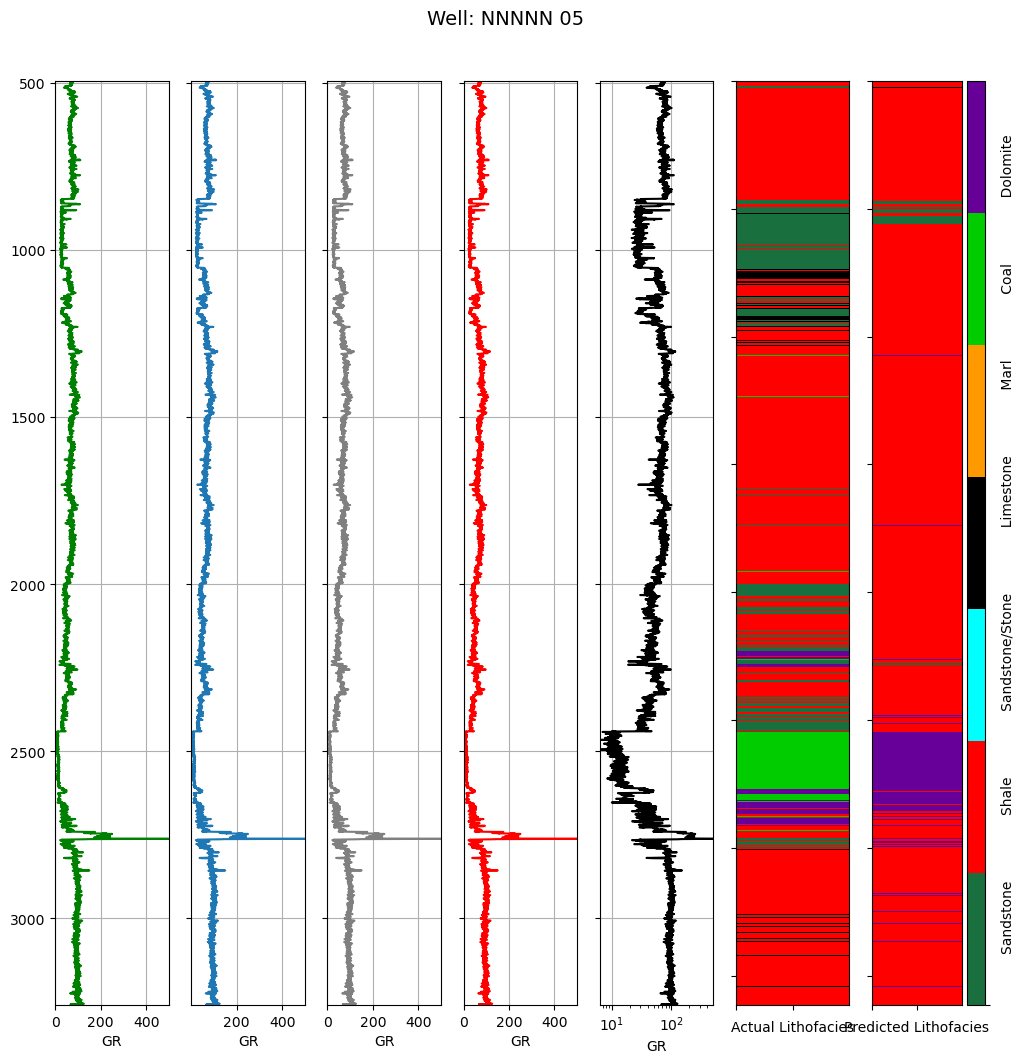

In [89]:
make_facies_log_plot(test_df, "GR", "GR", "GR", "GR", "GR")